<a href="https://colab.research.google.com/github/kasireddyasam/AI-course-/blob/main/Titanic%20Dataset-Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df=pd.read_csv('titanic_train.csv')

#Read the Data

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

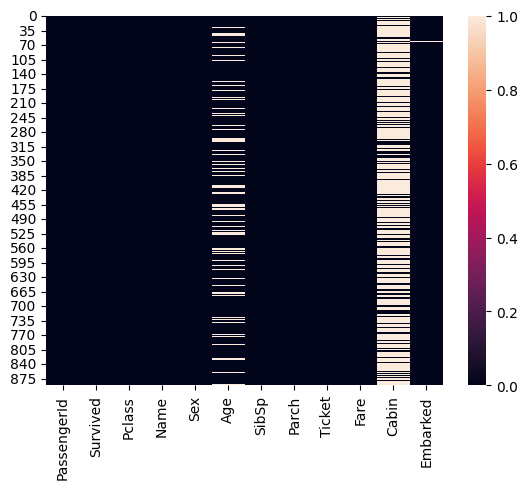

In [7]:
#need to visualise
df.isnull() # gives true if the data is not present in the data
import seaborn as sns
sns.heatmap(df.isnull())

white lines are the missing data
*see in the cabin there are too many missing data . it better to remove it
*age there are considerble no of ppls knoen age , we will fill the remaining data.
# 3 steps to solve the problem
* 1 fill
* 2 ignor
* 3 remove it

<Axes: xlabel='Survived', ylabel='count'>

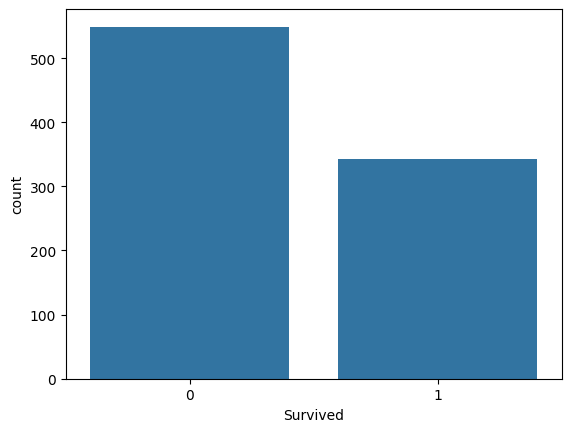

In [8]:
# checking wether the machine is abiased or not if the any class % is too low then it is
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Survived', ylabel='count'>

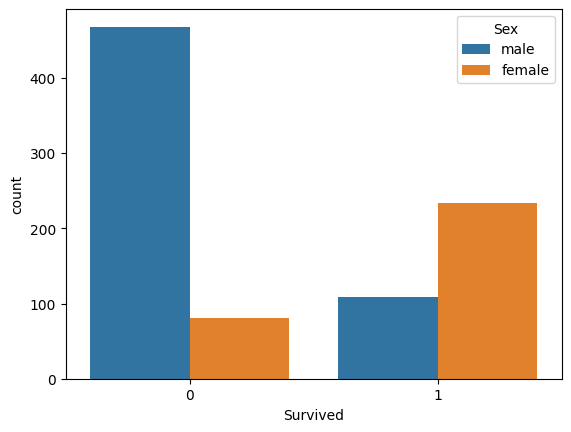

In [ ]:
# when you want to see any plot wrt to any column hue=<column name>
sns.countplot(x='Survived', data= df, hue ='Sex')

<Axes: xlabel='Sex', ylabel='count'>

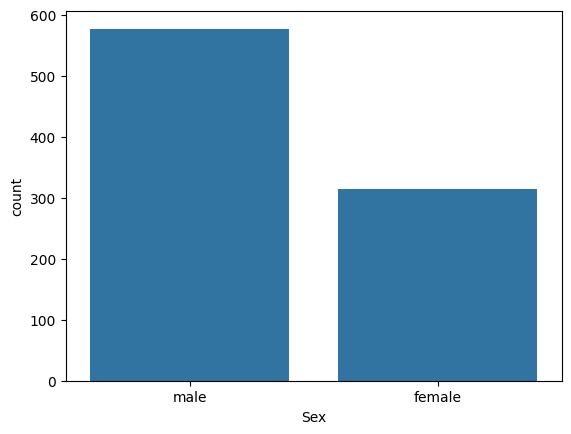

In [ ]:
sns.countplot(x="Sex", data= df,)

<Axes: xlabel='Sex', ylabel='count'>

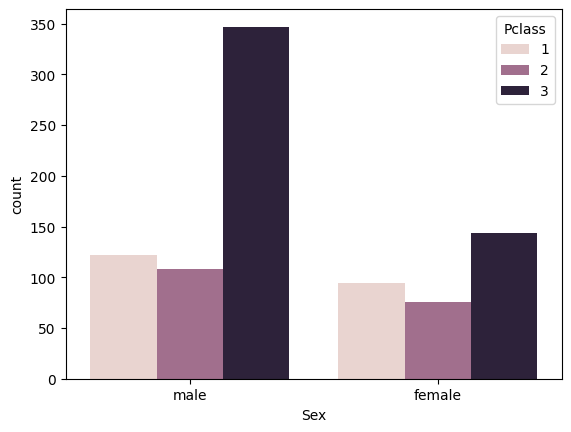

In [ ]:
sns.countplot(x="Sex",hue = "Pclass",data = df)

* there is abiase in Pclass 3 class ppls are vert much higher than other

<Axes: xlabel='Pclass', ylabel='count'>

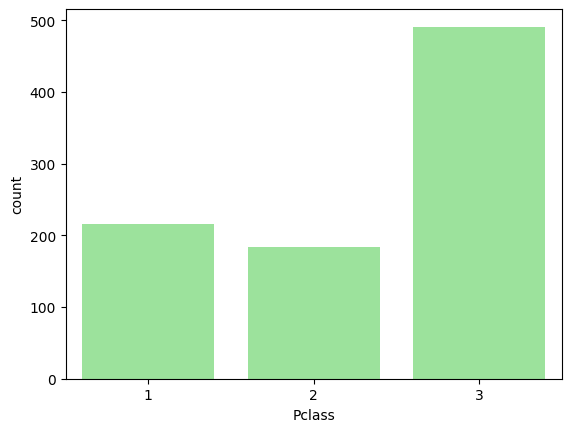

In [ ]:
sns.countplot(x= "Pclass", data= df,color= "lightgreen")

<Axes: xlabel='SibSp', ylabel='count'>

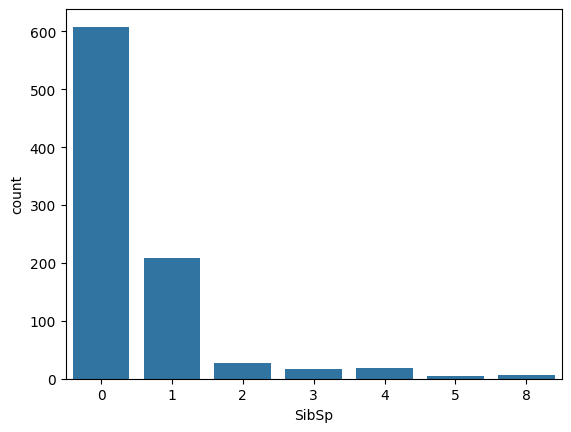

In [ ]:
# count of number of ppls with sibilings
sns.countplot(x = "SibSp",data = df) # countplot is used for catigrial data

Text(0, 0.5, 'no of ppls')

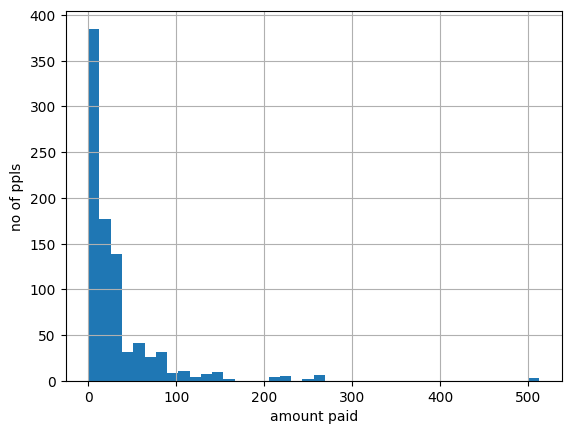

In [ ]:
# plot used to plot continues data displot
df['Fare'].hist(bins=40)
plt.xlabel("amount paid")
plt.ylabel("no of ppls")

# Data cleaning


In [16]:
def fill_age(cols=df[["Age" , "Pclass"]]):
  Age=cols[0]
  Pclass=cols[1]
  if(pd.isnull(Age)== True):
    if Pclass == 1:
      return 37
    elif Pclass==2:
      return 29
    else :
      return 24
  else:
    return Age





In [17]:
df["Age"]= df[["Age", "Pclass"]].apply(fill_age ,axis=1)

<Axes: >

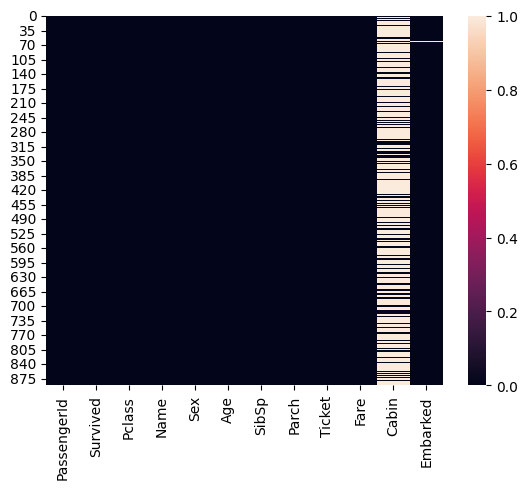

In [18]:
sns.heatmap(df.isnull())

* i repalced all the empty missing ages ith the mean of the corresponding Pclass;
as you can see no white lines in age column

In [19]:
# we are going to remove the cabine column becouse there are to many missing  values its not appropate to fill
df.drop('Cabin', axis = 1, inplace =True)

<Axes: >

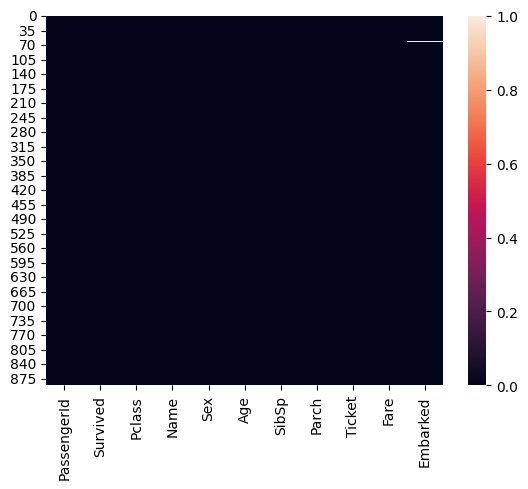

In [20]:
sns.heatmap(df.isnull())

In [21]:
# drop perticular row valus having null values using
df.dropna(inplace = True)

<Axes: >

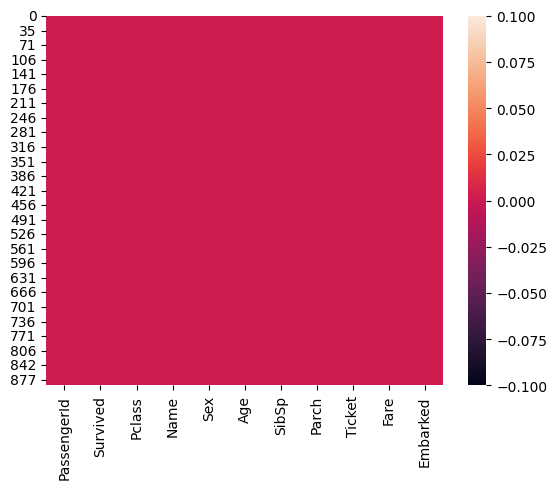

In [22]:
sns.heatmap(df.isnull())

In [23]:
#in machines only understand binary values; we need Gender and Embarked but it is in english
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
pd.get_dummies(df["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [29]:
# drop_first will removes the first column
sex = pd.get_dummies(df["Sex"], drop_first = True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [30]:
pd.get_dummies(df["Embarked"])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [33]:
embarked = pd.get_dummies(df["Embarked"],drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
#removing Pname,Sex,Ticket and i will add new created columns
df.drop(["Sex","Name", "Ticket", "Embarked"], axis = 1, inplace = True)

In [42]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [51]:
# adding new columns to the df
df = pd.concat([df, sex, embarked], axis = 1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [45]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [50]:
df.drop("PassengerId", axis = 1,inplace= True)

# Buliding Logistic Regression Model

In [48]:
from sklearn.model_selection import train_test_split

In [52]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S',
       'male', 'Q', 'S'],
      dtype='object')

In [53]:
# instidued of writing x=df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
 #      'male', 'Q', 'S']] we can directly write
x = df.drop("Survived", axis =1) #now in x except temparealy remove Survived and pass remaining columns
y = df["Survived"]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state= 101)


In [54]:
from sklearn.linear_model import LogisticRegression

In [57]:
log = LogisticRegression()
log.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
predicted_output = log.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
confusion_matrix(y_test, predicted_output)

array([[149,  14],
       [ 31,  73]])

In [61]:
#calculating F1 score
# class 0 ppls died
# class 1 survived
print(classification_report(y_test, predicted_output))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

